In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# 1. MEMBACA DATASET
try:
    data = pd.read_csv("iris_synthetic_data.csv")
    print("Dataset berhasil dimuat! ✅")
except Exception as e:
    print(f"Gagal memuat file: {e}")

# Lihat 5 data pertama
display(data)

# Cek struktur data
data.info()

Dataset berhasil dimuat! ✅


,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa
...,...,...,...,...,...
2995,7.2,3.6,6.0,2.5,Iris-virginica
2996,7.3,3.0,6.2,2.1,Iris-virginica
2997,6.9,3.2,5.7,2.3,Iris-virginica
2998,7.5,2.8,6.0,2.0,Iris-virginica


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  3000 non-null   float64
 1   sepal width   3000 non-null   float64
 2   petal length  3000 non-null   float64
 3   petal width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


=== DISTRIBUSI KELAS TARGET (TEKS) ===
label
Iris-setosa        1000
Iris-versicolor    1000
Iris-virginica     1000
Name: count, dtype: int64


/tmp/ipython-input-1415625733.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


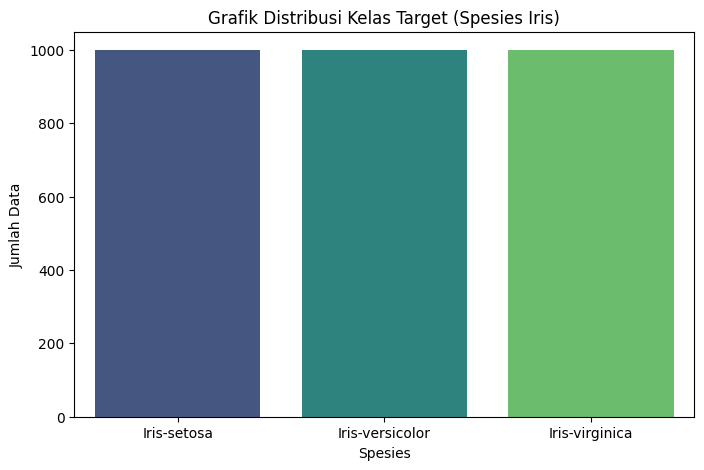

In [24]:
# 2. TAMPILKAN DISTRIBUSI KELAS TARGET
print("=== DISTRIBUSI KELAS TARGET (TEKS) ===")
distribusi = data['label'].value_counts()
print(distribusi)

# Visualisasi Distribusi Kelas Target
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Grafik Distribusi Kelas Target (Spesies Iris)')
plt.xlabel('Spesies')
plt.ylabel('Jumlah Data')
plt.show()

In [14]:
# 3. PRE-PROCESSING
# Menghapus duplikat agar model lebih akurat
data = data.drop_duplicates()

# Pisahkan Fitur dan Target
X = data.drop(columns=['label'])
y = data['label']

# Encode label (Teks ke Angka)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [15]:
# 4. SPLIT DATA (70% Training, 30% Testing)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.30, random_state=42
)

In [16]:
# 5. FEATURE SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [17]:
# 6. PEMODELAN KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Model KNN berhasil dilatih! ✅")

Model KNN berhasil dilatih! ✅


In [18]:
# 7. EVALUASI MODEL
y_pred = knn.predict(X_test)

print("\n=== HASIL EVALUASI MODEL KNN ===")
print(f"Accuracy  : {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision : {precision_score(y_test, y_pred, average='weighted')*100:.2f}%")
print(f"Recall    : {recall_score(y_test, y_pred, average='weighted')*100:.2f}%")
print(f"F1-Score  : {f1_score(y_test, y_pred, average='weighted')*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


=== HASIL EVALUASI MODEL KNN ===
Accuracy  : 100.00%
Precision : 100.00%
Recall    : 100.00%
F1-Score  : 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        60
Iris-versicolor       1.00      1.00      1.00        85
 Iris-virginica       1.00      1.00      1.00        79

       accuracy                           1.00       224
      macro avg       1.00      1.00      1.00       224
   weighted avg       1.00      1.00      1.00       224



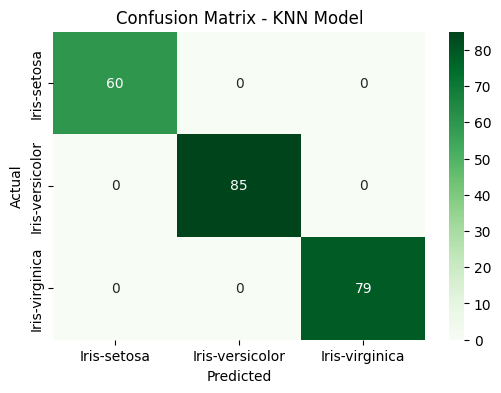

In [19]:
# 8. VISUALISASI CONFUSION MATRIX
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 9. PREDIKSI MANUAL
print("\n--- TEST PREDIKSI MANUAL ---")
try:
    sl = float(input("Masukkan Sepal Length: "))
    sw = float(input("Masukkan Sepal Width : "))
    pl = float(input("Masukkan Petal Length: "))
    pw = float(input("Masukkan Petal Width : "))

    # Skalakan data input manual sebelum prediksi
    input_data = scaler.transform([[sl, sw, pl, pw]])
    prediksi = knn.predict(input_data)
    hasil = le.inverse_transform(prediksi)

    print(f"\n🌸 Hasil Prediksi: {hasil[0]}")
except ValueError:
    print("Error: Harap masukkan angka saja!")


--- TEST PREDIKSI MANUAL ---
